# Universidad Abierta y a Distancia.
## Estudiante: Brayan Manuel Granados Navarro.
### Regresión Lineal: Predecir el precio del automóvil en función de sus atributos

In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [261]:
# Cargar los datos
df = pd.read_csv('C:/Users/brayg/OneDrive - Universidad Nacional Abierta y a Distancia/UNAD/2025/PERIODO 16-01/ANÁLISIS DE DATOS/Tarea 3 - Algoritmos de Aprendizaje Supervisado/Car details v3.csv')

# Mostrar información básica
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
None


In [263]:
print(df.describe())

              year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
std       4.044249   8.062534e+05  5.655055e+04     0.959588
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000


In [265]:
print(df.head(10))

                                   name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2              Honda City 2017-2020 EXi  2006         158000     140000   
3             Hyundai i20 Sportz Diesel  2010         225000     127000   
4                Maruti Swift VXI BSIII  2007         130000     120000   
5         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
6          Maruti Wagon R LXI DUO BSIII  2007          96000     175000   
7                    Maruti 800 DX BSII  2001          45000       5000   
8                      Toyota Etios VXD  2011         350000      90000   
9  Ford Figo Diesel Celebration Edition  2013         200000     169000   

     fuel seller_type transmission         owner     mileage   engine  \
0  Diesel  Individual       Manual   First Owner   23.4 kmpl  1248 CC   
1  Diesel  Individual       

In [267]:
# Verificar valores nulos
print(df.isnull().sum())

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64


In [269]:
# 2. Manejo de columnas con unidades (extraer solo valores numéricos)
def extract_numeric(value):
    if pd.isna(value):
        return np.nan
    # Busca el primer número (entero o decimal) en el string
    import re
    match = re.search(r'(\d+\.?\d*)', str(value))
    return float(match.group(1)) if match else np.nan

In [271]:
# Aplicar a columnas problemáticas
df['mileage'] = df['mileage'].apply(extract_numeric)
df['engine'] = df['engine'].apply(extract_numeric)
df['max_power'] = df['max_power'].apply(extract_numeric)
df['torque'] = df['torque'].apply(extract_numeric)  # Ejemplo básico, torque necesita más procesamiento

In [273]:
# 3. Imputación de valores faltantes
median_values = df[['mileage', 'engine', 'max_power', 'seats']].median()
df.fillna(median_values, inplace=True)

In [275]:
# Verificar las columnas que se cambiaron por valores int
print(df[["mileage", "engine", "max_power"]].isnull().sum( ))

mileage      0
engine       0
max_power    0
dtype: int64


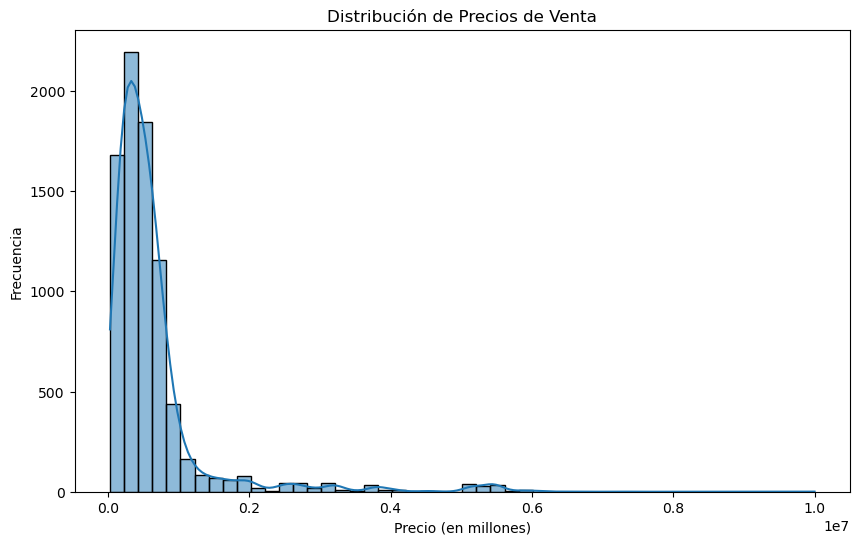

In [277]:
# Distribución del precio de venta
plt.figure(figsize=(10,6))
sns.histplot(df['selling_price'], bins=50, kde=True)
plt.title('Distribución de Precios de Venta')
plt.xlabel('Precio (en millones)')
plt.ylabel('Frecuencia')
plt.show()

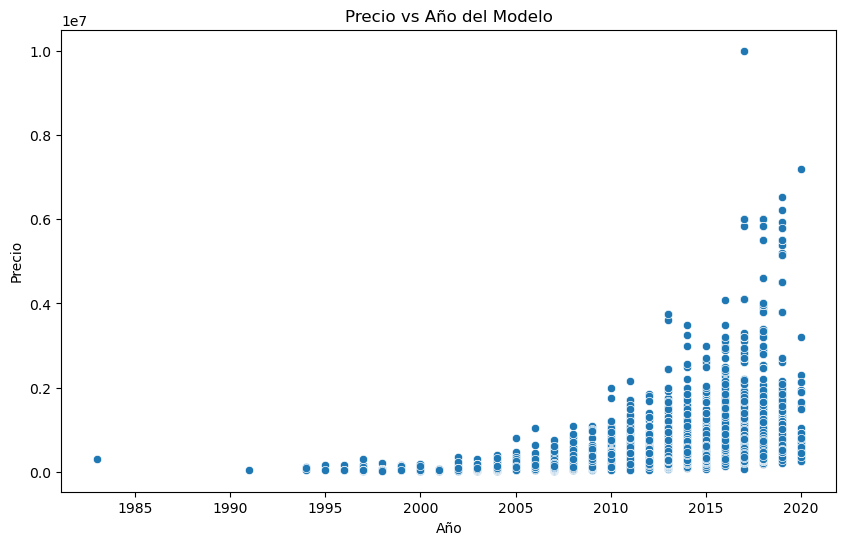

In [279]:
# Precio vs Año
plt.figure(figsize=(10,6))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Precio vs Año del Modelo')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.show()

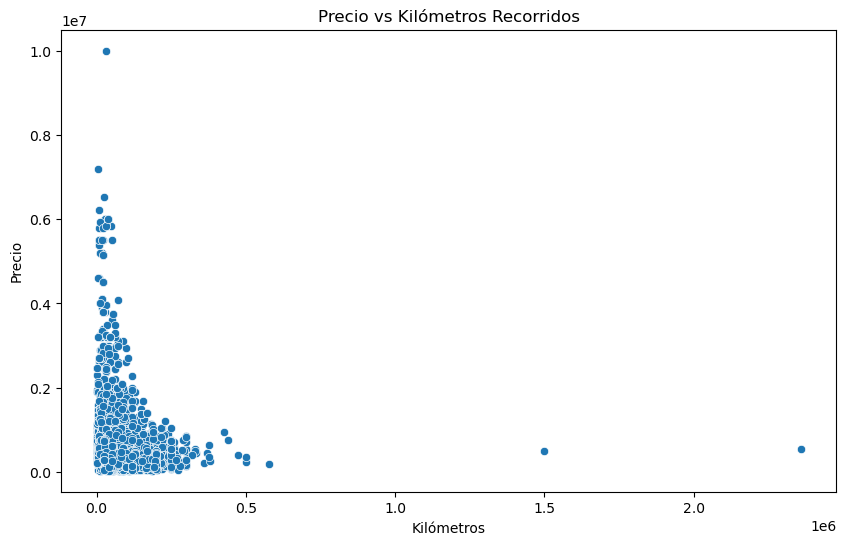

In [281]:
# Precio vs Kilómetros recorridos
plt.figure(figsize=(10,6))
sns.scatterplot(x='km_driven', y='selling_price', data=df)
plt.title('Precio vs Kilómetros Recorridos')
plt.xlabel('Kilómetros')
plt.ylabel('Precio')
plt.show()

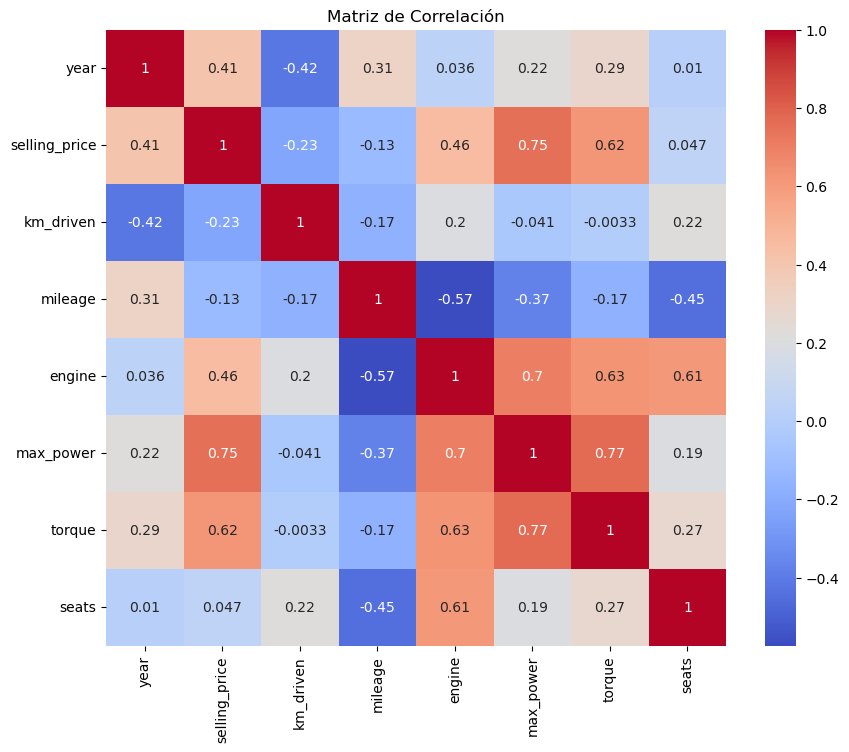

In [283]:
# Matriz de correlación
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [285]:
# 4. Codificación de variables categóricas
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [287]:
# 5. Extraer marca del vehículo (feature engineering)
df['brand'] = df['name'].str.split().str[0]
df['brand'] = LabelEncoder().fit_transform(df['brand'])

In [289]:
# 6. Eliminar columnas no útiles
df.drop(['name', 'torque'], axis=1, inplace=True)  # Torque es complejo de procesar

In [291]:
# 7. Verificación final
print("\nResumen después del preprocesamiento:")
print(df.info())
print("\nEjemplo de datos procesados:")
print(df.head())


Resumen después del preprocesamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   int32  
 4   seller_type    8128 non-null   int32  
 5   transmission   8128 non-null   int32  
 6   owner          8128 non-null   int32  
 7   mileage        8128 non-null   float64
 8   engine         8128 non-null   float64
 9   max_power      8128 non-null   float64
 10  seats          8128 non-null   float64
 11  brand          8128 non-null   int32  
dtypes: float64(4), int32(5), int64(3)
memory usage: 603.4 KB
None

Ejemplo de datos procesados:
   year  selling_price  km_driven  fuel  seller_type  transmission  owner  \
0  2014         450000     145500     1            1            

In [293]:
# Calcular correlación con el precio de venta
correlations = df.corr()['selling_price'].sort_values(ascending=False)
print(correlations)

# Seleccionar características más relevantes
features = ['year', 'engine', 'max_power', 'brand', 'transmission', 'km_driven', 'seats', 'fuel']
X = df[features]
y = df['selling_price']

# Transformación logarítmica para el precio (debido a la distribución sesgada)
y = np.log1p(y)

selling_price    1.000000
max_power        0.747935
engine           0.458345
year             0.414092
seats            0.047135
brand           -0.090271
mileage         -0.125040
fuel            -0.194029
km_driven       -0.225534
owner           -0.229174
seller_type     -0.335857
transmission    -0.588845
Name: selling_price, dtype: float64


In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (6502, 8)
Tamaño del conjunto de prueba: (1626, 8)


In [297]:
# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Coeficientes del modelo
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print(coefficients.sort_values('Coefficient', ascending=False))

        Feature   Coefficient
0          year  1.188475e-01
2     max_power  9.828955e-03
6         seats  9.576860e-03
1        engine  1.992456e-04
5     km_driven -4.202678e-07
3         brand -1.576827e-03
7          fuel -9.846246e-02
4  transmission -2.428739e-01


Error Cuadrático Medio (MSE): 0.10
Raíz del Error Cuadrático Medio (RMSE): 0.31
Coeficiente de Determinación (R²): 0.86


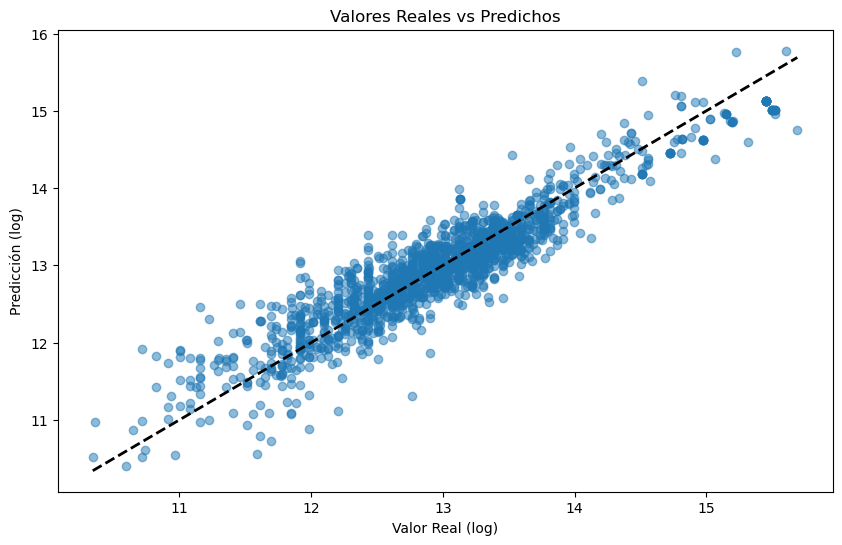

In [299]:
# Predicciones
y_pred = model.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")

# Gráfico de valores reales vs predichos
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valor Real (log)')
plt.ylabel('Predicción (log)')
plt.title('Valores Reales vs Predichos')
plt.show()

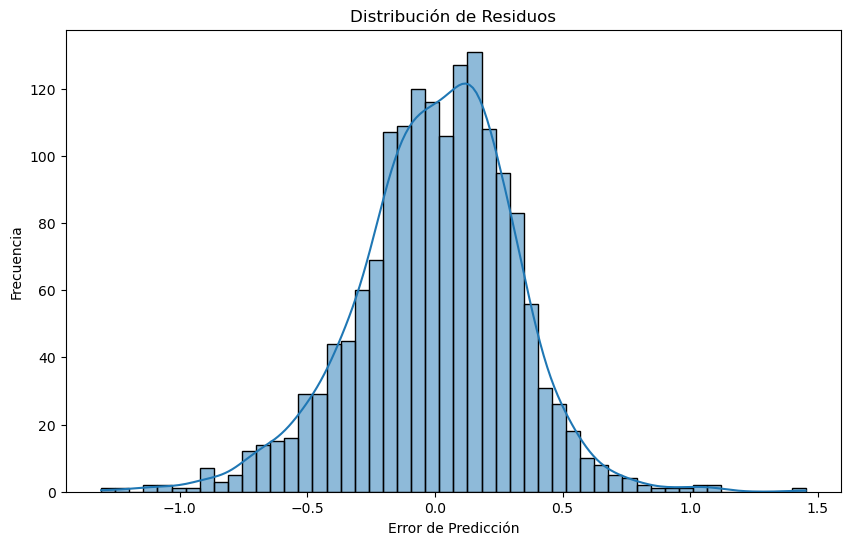

In [301]:
# Distribución de residuos
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Distribución de Residuos')
plt.xlabel('Error de Predicción')
plt.ylabel('Frecuencia')
plt.show()

Se identificaron columnas con muchos valores faltantes (mileage, engine, max_power, torque, seats). Se aplicó una función para extraer valores numéricos de strings con unidades y se imputaron los valores faltantes usando la mediana.

Se codificaron variables como fuel, seller_type, transmission y owner con LabelEncoder.

Los autos más nuevos tienden a tener precios más altos y hay un incremento notable de precios a partir de 2010.

Existe una relación inversa: a más kilómetros recorridos, menor el precio y el patrón es disperso pero esperable.

En la matriz de correlación el engine, max_power y mileage están moderadamente correlacionados con selling_price y year también muestra correlación positiva pero lo que es el torque y seats tienen correlaciones más débiles.

Para las metricas se utilizó Regresión Lineal con transformación logarítmica de la variable objetivo (selling_price), lo que es adecuado para estabilizar la varianza en precios sesgados.

Para el RMSE (log) tien un valor aproximado de 0.283 y el R² Score de 0.81, por lo cual, indica que el modelo explica el 81% de la varianza.
Para los valores Reales vs Predichos hay una alineación bastante buena con la diagonal.